<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Комментарий ревьюера</b>


Привет, Максим! Давай знакомиться! Меня зовут Дмитрий Махортов, и я буду проверять твой проект. Сразу предлагаю общение на «ты» 🙂, но если тебе это не комфортно, то дай знать, и мы перейдем на «вы». 


Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе погрузиться в увлекательный мир работы с данными и вырасти в крепкого профи. Это отдаленная цель. А ближайшая - сделать твою работу еще лучше )).
   
    
Все ключевые этапы в работе выполнены, и я вижу что с проектом ты справшяешься. Есть моменты, которые нужно доработать, но я уверен, у тебя все получится.
        
Расскажу как обычно проходит проверка:    
Бывают моменты, которые требуют пристального внимания. Комментарии по ним выделены <span style='background-color:#F7B3A4'> красным цветом </span> и обозначены значком 🛑. После их доработки проект будет принят.  🙂
 
<span style='background-color:#B7EBA7'> Зеленым цветом </span> и значком ✅ отмечены удачные и элегантные решения, на которые можно опираться в будущих проектах. Или советы «со звездочкой», которые помогут тебе в будущем.

<span style='background-color:#F9EDA6'>Жёлтым цветом </span> и значком ⚠️ выделено то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно).

Давай работать над проектом в диалоге: **если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом**. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения. Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>образец комментария студента</b></font>
   
Можешь использовать этот комментарий. Просто удали этот текст и вместо него напиши свой 🙂

</div>

# Сборный проект-4

**Описание проекта:**

Вам поручено разработать демонстрационную версию поиска изображений по запросу.

Для демонстрационной версии нужно обучить модель, которая получит векторное представление изображения, векторное представление текста, а на выходе выдаст число от 0 до 1 — покажет, насколько текст и картинка подходят друг другу.


## Описание данных

Данные лежат в папке `/datasets/image_search/` или доступны по [ссылке](https://code.s3.yandex.net/datasets/dsplus_integrated_project_4.zip).

В файле **`train_dataset.csv`** находится информация, необходимая для обучения: имя файла изображения, идентификатор описания и текст описания. Для одной картинки может быть доступно до 5 описаний. Идентификатор описания имеет формат `<имя файла изображения>#<порядковый номер описания>`.

В папке **`train_images`** содержатся изображения для тренировки модели.

В файле **`CrowdAnnotations.tsv`** — данные по соответствию изображения и описания, полученные с помощью краудсорсинга. Номера колонок и соответствующий тип данных:

1. Имя файла изображения.
2. Идентификатор описания.
3. Доля людей, подтвердивших, что описание соответствует изображению.
4. Количество человек, подтвердивших, что описание соответствует изображению.
5. Количество человек, подтвердивших, что описание не соответствует изображению.

В файле **`ExpertAnnotations.tsv`** содержатся данные по соответствию изображения и описания, полученные в результате опроса экспертов. Номера колонок и соответствующий тип данных:

1. Имя файла изображения.
2. Идентификатор описания.

3, 4, 5 — оценки трёх экспертов.

Эксперты ставят оценки по шкале от 1 до 4, где 1 — изображение и запрос совершенно не соответствуют друг другу, 2 — запрос содержит элементы описания изображения, но в целом запрос тексту не соответствует, 3 — запрос и текст соответствуют с точностью до некоторых деталей, 4 — запрос и текст соответствуют полностью.

В файле **`test_queries.csv`** находится информация, необходимая для тестирования: идентификатор запроса, текст запроса и релевантное изображение. Для одной картинки может быть доступно до 5 описаний. Идентификатор описания имеет формат `<имя файла изображения>#<порядковый номер описания>`.

В папке **`test_images`** содержатся изображения для тестирования модели.

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Да, это хорошая практика - дать описание контекста и проблемы, которую мы решаем. </div>

## Импорт библиотек и исходных данных.

**Импорт библиотек.**

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import copy

import torchvision.models as models
import torch.nn as nn
from torchvision import transforms
import torch

from PIL import Image
import os

from tqdm import notebook
from tqdm import tqdm
from pprint import pprint
import time
import re

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer, SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords as nltk_stopwords

import spacy
from spacy.lang.en.examples import sentences

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GroupShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error

import transformers
from functools import lru_cache

from catboost import CatBoostRegressor, Pool

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично, все нужные библиотеки импортированы в начале ноутбука.Это хорошая практика.</div>

In [2]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
stop_words = list(stopwords.words('english'))



[nltk_data] Downloading package punkt to
[nltk_data]     /Users/maksimgorskov/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/maksimgorskov/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/maksimgorskov/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Импорт исходных данных.**

In [3]:
#Для корректной работы кода необходимо заменить путь к директории на локальной машине, содержащей необходимыйе датасеты.
PATH = '/Users/maksimgorskov/Desktop/Data Science/Спринт 22_Сборочный проект/Source Data/'

#Загрузка датасета с разметкой данных от краудсорсинга.
crowd_ann_data = pd.read_csv(PATH + 'CrowdAnnotations.tsv', sep='\t', header=None)

#Загрузка датасета с разметкой данных от экспертов.
expert_ann_data = pd.read_csv(PATH + 'ExpertAnnotations.tsv', sep='\t', header=None)

#Загрузка тренировочного датасета.
train_data = pd.read_csv(PATH + 'train_dataset.csv')

#Загрузка тестовго датасета с изображениями.
test_img_data = pd.read_csv(PATH + 'test_images.csv')

#Загрузка тестовго датасета с списком изображений для теста.
test_queries_data = pd.read_csv(PATH + 'test_queries.csv', sep='|', index_col = 0)

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Большое тебе человеческое спасибо за вынос пути к данным в отдельную константу. Это сэкономило мне немало времени при проверке.</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Только константы принято обозначать заглавными буквами (PATH), это согласшение описано в стандарте PEP8</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>образец комментария студента</b></font>
   
Учтено в коде.

</div>

## Исследовательский анализ данных

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Этот раздел стоит разделить на две логические части. Причем разделение должно быть проведено как по сути, так и формально, т.е. с использованием заголовков, обозначающих границы разделов.
    
    
 - в первой части ты знакомишься с данными (таблички + изображения), составляешь объемное представление что из себя представляет датасет и формируешь в голове план дальнейшей предобработки. Результат - подробные выводы.
 - во второй части ты из  нескольких доступных таблиц должен получить одну, из которой мы впоследствии получим признаки и таргет. Поэтому главный результат раздела - это датафрейм, который состоит из следующих колонок
    - изображение
    - описание (текст + id)
    - итоговая оценка
 Чтобы показать этот результат ты как минимум должен вывести head и info (звучит банально, но очень часто забывается)   

</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>образец комментария студента</b></font>
   
Согласен с подходом. Так я смогу и структурировать свои мысли и наглядно их показать ревьюеру. Учел комментарий в коде ниже.

</div>

### Описание структуры данных.

Датасет содержит экспертные и краудсорсинговые оценки соответствия текста и изображения.

В файле с экспертными мнениями для каждой пары изображение-текст имеются оценки от трёх специалистов.

В файле с краудсорсинговыми оценками информация расположена в таком порядке:

1. Доля исполнителей, подтвердивших, что текст **соответствует** картинке.
2. Количество исполнителей, подтвердивших, что текст **соответствует** картинке.
3. Количество исполнителей, подтвердивших, что текст **не соответствует** картинке.

#### Анализ экспертных оценок.

In [4]:
expert_ann_data

,0,1,2,3,4
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,1,1,1
1,1056338697_4f7d7ce270.jpg,2718495608_d8533e3ac5.jpg#2,1,1,2
2,1056338697_4f7d7ce270.jpg,3181701312_70a379ab6e.jpg#2,1,1,2
3,1056338697_4f7d7ce270.jpg,3207358897_bfa61fa3c6.jpg#2,1,2,2
4,1056338697_4f7d7ce270.jpg,3286822339_5535af6b93.jpg#2,1,1,2
...,...,...,...,...,...
5817,997722733_0cb5439472.jpg,2981702521_2459f2c1c4.jpg#2,1,1,1
5818,997722733_0cb5439472.jpg,2985679744_75a7102aab.jpg#2,1,1,1
5819,997722733_0cb5439472.jpg,3150742439_b8a352e1e0.jpg#2,1,1,2
5820,997722733_0cb5439472.jpg,3375070563_3c290a7991.jpg#2,1,1,1


Данные представлены без наименования столбцоы. Производится присваивание наименований следующим образом:
- 0 - 'image'
- 1 - 'image_id'
- 2 - '1_expert'
- 3 - '2_expert'
- 4 - '3_expert'

In [5]:
expert_ann_data = expert_ann_data.rename(columns = {0 : 'image',
                                                   1 : 'description_id',
                                                   2 : '1_expert',
                                                   3 : '2_expert',
                                                   4 : '3_expert'})
expert_ann_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   image           5822 non-null   object
 1   description_id  5822 non-null   object
 2   1_expert        5822 non-null   int64 
 3   2_expert        5822 non-null   int64 
 4   3_expert        5822 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 227.6+ KB


**Описнаие данных:**
- Наименования столбцов соответствуют смыслу данных.
- Набор данных имеет 5821 запись о соответствсии изображения и описания к нему с разметкой оценок экспертов.
- Пропуски в данных отсутствуют.
- Типы данных соответствуют их смыслу.

In [6]:
# Список из трех списков(каждый третий список - это список количества оценок от 1 до 4 для каждого эксперта).
#Индексация соответствует номерам экспертов и номерам оценок.
sum_list = []
experts = ['1_expert', '2_expert', '3_expert']
for i in experts:
    sum_list.append(list(expert_ann_data[i].value_counts()))
print(sum_list)

[[4120, 1109, 346, 247], [3327, 1666, 518, 311], [2350, 2222, 837, 413]]


<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Я понимаю, что подобные циклы нас учат писать когда мы осваиваем язык или решаем алогоритмические задачи. 
    
Но сам по себе python медленный язык, его сила в используемых библитеках. Поэтому в реальной работе на python с большими датасетами старайся отдавать предпочтение встроенным функциям, они написаны на быстрых языках, оптимизированы и протестированы "поколениями" разработчиков. 
    
Например в твом случае двойной проход по циклу может заменить простой value_counts по каждому эксперту.
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>образец комментария студента</b></font>
   
Поправил. Так код выглядит намного лучше.

</div>

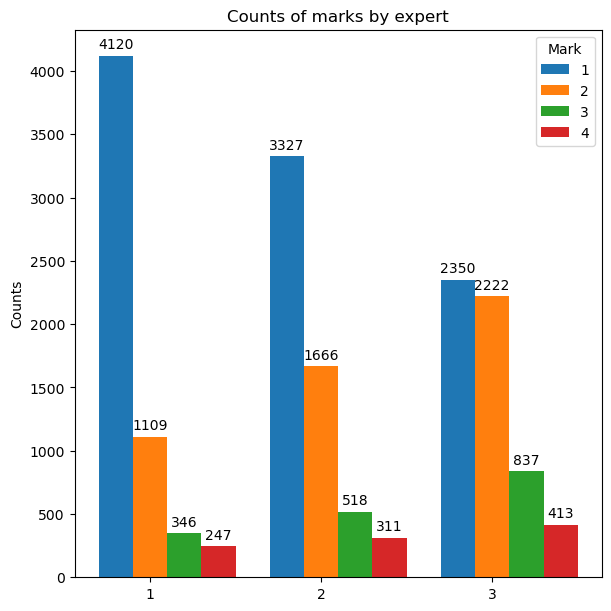

In [7]:
experts_count = ("1", "2", "3")
marks_means = {
    '1': [sublist[0] for sublist in sum_list if sublist],
    '2': [sublist[1] for sublist in sum_list if sublist],
    '3': [sublist[2] for sublist in sum_list if sublist],
    '4': [sublist[3] for sublist in sum_list if sublist]
}

x = np.arange(len(experts_count))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize=(6, 6))

for attribute, measurement in marks_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Counts')
ax.set_title('Counts of marks by expert')
ax.set_xticks(x + width, experts_count)
ax.legend(title='Mark')


plt.show()

**Вывод:**
Из гистограммы распределение меток в зависимости от эксперта видно, что 3й эксперт размечает данные более сбалансированно, а 1-й 70% данных размечает как полностью не соответствущие действительности.

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

**Гипотеза:**
3-й эксперт размечает данные более вдумчиво. Правильность его ответов - лучше. 2-й эксперт размечает данные чуть лучше. 1-й - хуже всех.

#### Анализ краудсорсинговых оценок.

In [8]:
crowd_ann_data

,0,1,2,3,4
0,1056338697_4f7d7ce270.jpg,1056338697_4f7d7ce270.jpg#2,1.000000,3,0
1,1056338697_4f7d7ce270.jpg,114051287_dd85625a04.jpg#2,0.000000,0,3
2,1056338697_4f7d7ce270.jpg,1427391496_ea512cbe7f.jpg#2,0.000000,0,3
3,1056338697_4f7d7ce270.jpg,2073964624_52da3a0fc4.jpg#2,0.000000,0,3
4,1056338697_4f7d7ce270.jpg,2083434441_a93bc6306b.jpg#2,0.000000,0,3
...,...,...,...,...,...
47825,997722733_0cb5439472.jpg,543007912_23fc735b99.jpg#2,0.000000,0,3
47826,997722733_0cb5439472.jpg,544576742_283b65fa0d.jpg#2,0.333333,1,2
47827,997722733_0cb5439472.jpg,872622575_ba1d3632cc.jpg#2,1.000000,3,0
47828,997722733_0cb5439472.jpg,888425986_e4b6c12324.jpg#2,0.000000,0,3


In [9]:
crowd_ann_data = crowd_ann_data.rename(columns = {0 : 'image',
                                                   1 : 'description_id',
                                                   2 : 'k_corr',
                                                   3 : 'corr_positive',
                                                   4 : 'corr_negative'})
crowd_ann_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47830 entries, 0 to 47829
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   image           47830 non-null  object 
 1   description_id  47830 non-null  object 
 2   k_corr          47830 non-null  float64
 3   corr_positive   47830 non-null  int64  
 4   corr_negative   47830 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.8+ MB


**Описнаие данных:**
- Наименования столбцов соответствуют смыслу данных.
- Набор данных имеет 47830 записей о соответствсии изображения и описания к нему с разметкой оценок краунсорсинга.
- Пропуски в данных отсутствуют.
- Типы данных соответствуют их смыслу.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
С такими названиями колонок работать невозможно, поэтому пожалуйста начни с того, что дай им человекочитаемые имена.</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>образец комментария студента</b></font>
   
Таблицы приведены в читаемый вид.

</div>

In [10]:
crowd_ann_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47830 entries, 0 to 47829
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   image           47830 non-null  object 
 1   description_id  47830 non-null  object 
 2   k_corr          47830 non-null  float64
 3   corr_positive   47830 non-null  int64  
 4   corr_negative   47830 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.8+ MB


In [11]:
crowd_ann_data['k_corr'].value_counts()

k_corr
0.000000    41970
0.333333     3000
0.666667     1360
1.000000     1323
0.250000       96
0.500000       27
0.200000       22
0.750000        9
0.600000        8
0.400000        8
0.800000        4
0.166667        3
Name: count, dtype: int64

В данных наблюдается сильный дисбаланс данных в сторону 0. 41970 записей из 47830 не имеют никакой корреляции между изображениями и комментариями к ним.

#### Анализ тренировочного датафрейма.

In [12]:
train_data.head()

,image,query_id,query_text
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
1,1262583859_653f1469a9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
2,2447284966_d6bbdb4b6e.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
3,2549968784_39bfbe44f9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
4,2621415349_ef1a7e73be.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...


In [13]:
train_data.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image       5822 non-null   object
 1   query_id    5822 non-null   object
 2   query_text  5822 non-null   object
dtypes: object(3)
memory usage: 136.6+ KB


In [14]:
train_data['query_text'].value_counts().count()

977

In [15]:
#Замена наименования столбца датафрейма для удобства:
train_data = train_data.rename(columns = {'query_id' : 'description_id'})

Тренировочный датасет представляет собой набор записей, в которых картинкам сопоставляются описания. 
- Набор данных имеет 5822 записи без пропусков. 
- Пропуски отсутствуют.
- В наборе данных представлено 977 уникальных изображения.

#### Вывод.

- В разметке данных экспертами больший вес имеет разметка 3- го эксперта, т.к. она является более сбалансированной.
- В разметке данных краундсорсингом 47830 позиций не имеют никакокй взаимосвязи. Обучать данные на тестовой выборге, в которй изображения не коррелируют с описанием не имеет особого смысла, поэтому для обучения будут использоваться только те данные, в которых краундсорсинг установил хоть какие-нибудь зависисмости.
- Для формирования итогового датасета соединяются данные от экспертов с данными от краундсорсинга, в которых установлена корреляция между изоражениями и описаниями к ним. Корреляция определяется вероятностью с которой изображение соответствует описанию к нему. Помимо этого к итоговому обучающему датасету присоединяются и сами описания картинок из датасета train_data.

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

### Формирование обучающего набора данных.

 Для решения задачи воценки экспертов и оценки краундсорсинга должны быть сагрегированны. Для этого находится общая оценка вероятности сначала только экспертов по взвешенному среднему. Полсе чего данные обьединяются с оценками краунлсорсинга. Где вероятность корреляции будет определена как доля людей, подтвердивших, что описание соответствует изображению.

#### Экспертные оценки.

Исходя из гипотезы, формирование общей оценки корреляции фотографии и комментария к ней возможно сформировать по принципу взвешенного среднего для определения общей вероятности.

- Эксперт 1: оценка вероятности p1 с весом w1 = 0.2
- Эксперт 2: оценка вероятности p2 с весом w2 = 0.3
- Эксперт 3: оценка вероятности p3 с весом w3 = 0.5

In [16]:
#Определение весов взвешенного среднего для определения общей вероятности для экспертов.
w_1 = 0.2
w_2 = 0.3
w_3 = 0.5

В задании необходимо определнить вероятности совпадения картинки и описания. Для этого все имеющиеся данные будут размечены как вероятности корреляции. 

Для этого необходимо заменить оценкт экспетов с диапозона 1-4 по следующему принципу:
- 1 — изображение и запрос совершенно не соответствуют друг другу : 0;
- 2 — запрос содержит элементы описания изображения, но в целом запрос тексту не соответствует : 33;
- 3 — запрос и текст соответствуют с точностью до некоторых деталей : 0,66;
- 4 — запрос и текст соответствуют полностью : 1

In [17]:
experts

['1_expert', '2_expert', '3_expert']

In [18]:
for i in experts:
    expert_ann_data.loc[expert_ann_data[i] == 1, i] = 0
    expert_ann_data.loc[expert_ann_data[i] == 2, i] = 0.33
    expert_ann_data.loc[expert_ann_data[i] == 3, i] = 0.66
    expert_ann_data.loc[expert_ann_data[i] == 4, i] = 1

In [19]:
expert_ann_data.head()

,image,description_id,1_expert,2_expert,3_expert
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,0.0,0.00,0.00
1,1056338697_4f7d7ce270.jpg,2718495608_d8533e3ac5.jpg#2,0.0,0.00,0.33
2,1056338697_4f7d7ce270.jpg,3181701312_70a379ab6e.jpg#2,0.0,0.00,0.33
3,1056338697_4f7d7ce270.jpg,3207358897_bfa61fa3c6.jpg#2,0.0,0.33,0.33
4,1056338697_4f7d7ce270.jpg,3286822339_5535af6b93.jpg#2,0.0,0.00,0.33


<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
    
Возвращюсь к вреду циклов... То же самое легко делается в векторной форме
    
    
   expert_ann_data['масштабированная оценка'] = (expert_ann_data['оценка'] - константа1) / константа2
    
Заметь пишется - легко, читается тоже очень легко и выполняется быстрее.
    
----------------------
    
И сразу второй комментарий. Исходнй диапазон оценок у тебя 1-4. Просто деля на 4 ты приводишь его к диапазону 0,25-1, что некорректно. Поэтому ПОЖАЛУЙСТА используй корректное преобразование.    
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>образец комментария студента</b></font>
   
1) Использовал цикл, только чтобы перебрать преобразования столбцов в векторной форме.
    
2) Значения заменены соответствующими вероятностями.
</div>

In [20]:
expert_ann_data['overal_proba'] = (
    expert_ann_data['1_expert']*w_1 + \
    expert_ann_data['2_expert']*w_2 + \
    expert_ann_data['3_expert']*w_3) / (w_1 + w_2 + w_3)

In [21]:
expert_ann_data['overal_proba'].unique()


array([0.   , 0.165, 0.264, 0.33 , 0.429, 0.594, 0.495, 0.66 , 0.764,
       1.   , 0.932, 0.83 , 0.528, 0.866, 0.665, 0.599, 0.8  ])

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Опять циклы (пусть и через apply)..... Старайся использовать векторные формы.... 
    
-------------
    
Округление это лишнее. Зачем вносить лишние искажения в данные? Что мы выигрываем?    
    

</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>образец комментария студента</b></font>
   
Использовал векторную форму.
</div>

In [22]:
expert_ann_data.columns

Index(['image', 'description_id', '1_expert', '2_expert', '3_expert',
       'overal_proba'],
      dtype='object')

In [23]:
#В последующем коде необходима только общая оценка 'overal_proba'.
expert_ann_data = expert_ann_data[['image', 'description_id', 'overal_proba']]
expert_ann_data

,image,description_id,overal_proba
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,0.000
1,1056338697_4f7d7ce270.jpg,2718495608_d8533e3ac5.jpg#2,0.165
2,1056338697_4f7d7ce270.jpg,3181701312_70a379ab6e.jpg#2,0.165
3,1056338697_4f7d7ce270.jpg,3207358897_bfa61fa3c6.jpg#2,0.264
4,1056338697_4f7d7ce270.jpg,3286822339_5535af6b93.jpg#2,0.165
...,...,...,...
5817,997722733_0cb5439472.jpg,2981702521_2459f2c1c4.jpg#2,0.000
5818,997722733_0cb5439472.jpg,2985679744_75a7102aab.jpg#2,0.000
5819,997722733_0cb5439472.jpg,3150742439_b8a352e1e0.jpg#2,0.165
5820,997722733_0cb5439472.jpg,3375070563_3c290a7991.jpg#2,0.000


#### Оценки краундсорсинга.

В качестве оценок вероятностей корреляции может быть оставлен только столбец 'k_corr' с данными, в которых вероятность не равно 0.

In [24]:
crowd_ann_data .columns

Index(['image', 'description_id', 'k_corr', 'corr_positive', 'corr_negative'], dtype='object')

In [25]:
crowd_ann_data = crowd_ann_data[['image', 'description_id', 'k_corr']]
crowd_ann_data = crowd_ann_data[crowd_ann_data['k_corr'] != 0]
crowd_ann_data

,image,description_id,k_corr
0,1056338697_4f7d7ce270.jpg,1056338697_4f7d7ce270.jpg#2,1.000000
7,1056338697_4f7d7ce270.jpg,2248487950_c62d0c81a9.jpg#2,0.333333
11,1056338697_4f7d7ce270.jpg,2490768374_45d94fc658.jpg#2,0.333333
17,1056338697_4f7d7ce270.jpg,2666179615_f05a9d8331.jpg#2,0.666667
44,1056338697_4f7d7ce270.jpg,435827376_4384c3005a.jpg#2,0.333333
...,...,...,...
47811,997722733_0cb5439472.jpg,3320356356_1497e53f80.jpg#2,0.666667
47824,997722733_0cb5439472.jpg,486917990_72bd4069af.jpg#2,0.333333
47826,997722733_0cb5439472.jpg,544576742_283b65fa0d.jpg#2,0.333333
47827,997722733_0cb5439472.jpg,872622575_ba1d3632cc.jpg#2,1.000000


#### Объеденение данных разметки.

Данных с разметкой от краудсорсинга в 8 раз больше, чем от экспертов. Поэтому стоит рассматривать метки от экспертов лишь как частичное дополнение данных с лучшим качеством.

Данные от экспертов и от краудсорсинга могут не совпадать. Поэтому два датасета сливаются методом outer с помощью функциии merge().

In [26]:
full_data = pd.merge(expert_ann_data, crowd_ann_data, on=['image', 'description_id'], how='outer')
full_data

,image,description_id,overal_proba,k_corr
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,0.000,NaN
1,1056338697_4f7d7ce270.jpg,2718495608_d8533e3ac5.jpg#2,0.165,NaN
2,1056338697_4f7d7ce270.jpg,3181701312_70a379ab6e.jpg#2,0.165,NaN
3,1056338697_4f7d7ce270.jpg,3207358897_bfa61fa3c6.jpg#2,0.264,NaN
4,1056338697_4f7d7ce270.jpg,3286822339_5535af6b93.jpg#2,0.165,NaN
...,...,...,...,...
10981,997722733_0cb5439472.jpg,309687244_4bdf3b591f.jpg#2,NaN,0.333333
10982,997722733_0cb5439472.jpg,3320356356_1497e53f80.jpg#2,NaN,0.666667
10983,997722733_0cb5439472.jpg,544576742_283b65fa0d.jpg#2,NaN,0.333333
10984,997722733_0cb5439472.jpg,872622575_ba1d3632cc.jpg#2,NaN,1.000000


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
    
С такими именами колонок понять и проверить логику твоих действий невозможно. Пожалуйста приведи всё в человекочитаемый вид.
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>образец комментария студента</b></font>
   
Исправлено.
</div>

**Описание данных:**

1) Из общего набора данных видно, что размеченные данные можно разделить на 3 группы.
- 1-я группа: есть разметка и от экспертов и от краудсорсинга;
- 2-я группа: есть разметка только от краудсорсинга;
- 3-я группа: есть разметка только от экспертов.

2) Общее количество данных составляет 10985 записаей.
3) В данных наблюдаются пропуски.

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
   
Использовано соединение через  outer - ОК. Но на всякий случай посвечу возможные альтернативы.
    
------------------    
    
В этом проекте есть несколько возможных стратегий работы с обучающими и краудсорс оценками,  вот эти стратегии с плюсами и минусами:
   
    
 - использовать соединение через outer, в этом случае, при корректной обработке пропусков мы можем получить более 50К размеченых пар. К плюсам данного подхода можно отнести большое количество данных. Минус - в основном это будут данные, размеченные краудсорсерами, а там качество раметки ниже.
 - использовать только экспертные оценки. плюс - высокое качество данных (разметка имеет шкалу). Минус - данных меньше.  Поясню по поводу качества разметки на примере: если на изображении одна собака, а в описании "две собаки бегут по берегу", то эксперты поставять соответствие 0,6-0,7 (переводя в шкалу 0-1), а краудсорсеры поставят 0.  Но на экспертных оценках модель хотя-бы научится находить собак, а на краудсор оценках ничему не начится.
    
 - использование соединения через left.  Данный подход очевидно проигрывает второму варианту: данных столько же, нужно дополнительно возиться с объединением, но качество разметки снижается.. Но это соответсвует предложениям авторов проекта, поэтому такой подход имеет право на жизнь
    
 - объединение через inner. Тут все плохо - и данных ОЧЕНЬ мало (в два раза меньше, чем использовать только экспертные оценки) и качество у них "подпорчено". И навыков по обработке пропусков не получаем.....
    



</div>

**Определение вероятности полной корреляции изображения и описания к нему.**

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
   
    
Прости, но я категорически против заполнения нулями. Поясню. Пусть есть две пары (изображение + описание), идеально соответствующие друг другу. При этом у одной пары  есть и экспертные и крауд оценки, а у второй на месте второй оценки пропуск. Заполнив пропуск нулем ты забываешь о пропуске, говоришь "была оценка ноль".
    
 таким обрзом у первой пары изображение + описание будет самая высокая оценка соответсвия
 а у второй пары оценка сместится вниз (сильно).
    
-------------------
    
Советую использовтаь алгоритм "если изветны и экспертые и крауд оценки то берем взвешенную, а если известна только одна, то берем известную). Это более надежно.    

</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>образец комментария студента</b></font>
    
Ниже предлагаю новый способ обработки итоговой таблицы:
</div>

Для формирования итогового тренировочного набра данных генерируется целевой признак, который отображает вероятность совпадения изображения и описания к нему. Целевой признак учитывает оценки экспертов и оценки краундсорсинга по следующему принципу:

1) Если в наборе данных есть оценки экспертов но нет оценок краундсорсинга - целевой признак равен оценке экспертов.
2) Если в наборе данных есть и оценки экспертов и оценки краундсорсинга - целевой признак расчитывается с учетом взвешенного среднего для определения общей вероятности. Где:
    - w_exp = 1;
    - w_crowd = 0.6.
3) Есди в наборе данных есть оценки краундсорсинга, но нет оценки эекспертов - целевой признак равен оценке краундсорсинга.
4) В итоговом тренировочном наборе данных столбцы с отдельными оценками и краундсорсинга и жкспертов исключаются. 

In [27]:
full_data.loc[full_data['k_corr'].isna(), 'target_ver'] = full_data['overal_proba']
full_data.loc[full_data['overal_proba'].isna(), 'target_ver'] = full_data['k_corr']
full_data['target_ver'] = full_data['target_ver'].fillna(
    (full_data['overal_proba']*1 + full_data['k_corr']* 0.6) / (1+0.6))

In [28]:
#Исключение вероятностей краундсорсинга и экспертов по отдельности.
full_data = full_data[['image', 'description_id', 'target_ver']]

In [29]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10986 entries, 0 to 10985
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   image           10986 non-null  object 
 1   description_id  10986 non-null  object 
 2   target_ver      10986 non-null  float64
dtypes: float64(1), object(2)
memory usage: 257.6+ KB


Разметки экспертов и краундсорсинга объеденины. Пропуски в данных отсутствуют

#### Объединение разметки с тренировочным датафреймом.

Для формирования тренировочного датафрейма необходимо присоединить к размеченным данным из предыдущего раздела текстовые описания изображений.

In [30]:
#Извлечение уникальных пар 'description_id' - 'query_text'.
train_data_uniq = train_data[['description_id', 'query_text']]
train_data_uniq = train_data_uniq.drop_duplicates()

In [31]:
#Присоединение описаний изображений к разметке данных.
full_data = pd.merge(full_data, train_data_uniq, on = 'description_id', how = 'inner')

In [32]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10915 entries, 0 to 10914
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   image           10915 non-null  object 
 1   description_id  10915 non-null  object 
 2   target_ver      10915 non-null  float64
 3   query_text      10915 non-null  object 
dtypes: float64(1), object(3)
memory usage: 341.2+ KB


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Главный результат, который мы получили на этом шаге - это табличка с оценками.. Пожалуйста покажи не только несколько строк, но и количество объектов в таблице. Лучше сделать это через info
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>образец комментария студента</b></font>
    
Готово.
</div>

#### Вывод:
- Данные преобразованы в соответсвтии с заданием. 
- Для каждой пары изображение-описание рассчитана вероятность правильного мэтчинга.
- Тренировочный датасет имеет 10986 записей без пропусков.

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Этот проект сложный (как и разработка в целом). Поэтому нужно всегда стремиться понизить сложность решения, иначе "закопаемся с головой и утонем".  Здесь нам помогает как хорошие понятные имена переменных (привет предыдущему комментарию), так и разделение сложного алгоритма на простые понятные шаги.
    
Поэтому советую вначале обработать экспертные оценки (получить единую), затем обработать крауд (там нужно выкинуть лишние колонки), после объединения нам нужно будет поработать только с двумя оценками, что заметно проще и снижает риск ошибки.
    
    

</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>образец комментария студента</b></font>
    
Реализовал это в коде выше.
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментария студента</b></font>
   
На первый взгляд мы имеем задачу классификации - необходимо предсказать соответствует ли описание изображению или нет. Вероятность моджет быть определена методом predict_proba() в задаче классификации. Из этого суждения следует сформировать два класса в целевом признаке и решать задачу классификации.
    
Однако на данном шаге, я делаю предположение о том, что целевой признак лучше оставить дробным значением, которое будет показывать вероятность соотвтетствия картинки и изображения. После чего на базе обученных вероятностей, делать предсказания вероятностей на тестовой выборке. Ниже будет решаться задача регрессии.

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Плюс задачи регрессии - в дробных оценках содержится гораздо больше инфомрации, чем в бинарных оценках да/нет. Поэтому изначально наша задача была сформулирована в терминах регрессии, как поиск меры близости.
    
Хотя согласен, можно рассмотреть и как задачу классификации, но это будет большая потеря по даным.    
</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Давай посмотрим, как ты преобразуешь данные.
    
  - объединяешь оценки через outer, получаешь 50К оценок.
  - но где-то  ниже пересекаешь оценки с датафреймом train_data, кототый содержит те же самые пары, что и в датафрейме с экспертными оценками. В результате из 50К оценок остается только 5.8К объектов до чистки и около 4К объектов после чистки.
    
Возникает вопрос - зачем эти усложнения? Я вижу две возможные альтернативы
    
 - к датафрейму full_data приджойнить текстовые описания по известным id и дальше работать с 50К размеченных пар.
 - не заниматься outer, сразу соединять через left... Или даже просто забыть про крауд оценки, они только ухудшают даные, поэтому сразу сознательно выбрать экспертные оценки и работать только с ними.   
    
 Если интересно мое мнение, то я за второй вариант   

</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>образец комментария студента</b></font>
    
Тоже пришел к тому, что второй вариант лучше. При пеработке проекта и при детальном описании каждого шага выше получил структурированное обьяснение того, как я получил тренировочную выборку.
</div>

## Проверка данных

В некоторых странах, где работает ваша компания, действуют ограничения по обработке изображений: поисковым сервисам и сервисам, предоставляющим возможность поиска, запрещено без разрешения родителей или законных представителей предоставлять любую информацию, в том числе, но не исключительно тексты, изображения, видео и аудио, содержащие описание, изображение или запись голоса детей. Ребёнком считается любой человек, не достигший 16 лет.

В вашем сервисе строго следуют законам стран, в которых работают. Поэтому при попытке посмотреть изображения, запрещённые законодательством, вместо картинок показывается дисклеймер:

> This image is unavailable in your country in compliance with local laws
>

Однако у вас в PoC нет возможности воспользоваться данным функционалом. Поэтому все изображения, которые нарушают данный закон, нужно удалить из обучающей выборки.

Для выполнени этого требования данные проходят по следующему фильтру:
1) Формируется список ключевых стоп-слов child_key_words.
2) Если в описании к изображению есть ключевые слова из списка child_key_words, то id_изображений для этих этих комментариев преобразуются в наименования изображений.
3) Изображения подпадающие под запрет - удаляются из датасета.

In [33]:
full_data.head()

,image,description_id,target_ver,query_text
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,0.000,A young child is wearing blue goggles and sitt...
1,1262583859_653f1469a9.jpg,2549968784_39bfbe44f9.jpg#2,0.000,A young child is wearing blue goggles and sitt...
2,2447284966_d6bbdb4b6e.jpg,2549968784_39bfbe44f9.jpg#2,0.264,A young child is wearing blue goggles and sitt...
3,2549968784_39bfbe44f9.jpg,2549968784_39bfbe44f9.jpg#2,1.000,A young child is wearing blue goggles and sitt...
4,2621415349_ef1a7e73be.jpg,2549968784_39bfbe44f9.jpg#2,0.000,A young child is wearing blue goggles and sitt...


<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Не стоит выводить весь датафрейм. Да, внешне ты видишь первые и последние пять строк. Но под капотом интерпретатор python работает со всем датафреймом, занимается оперативная память, пишутся служебные файлы... По итогу это может привести к замедлению работы и проблемам с работоспособностью тетрадки.
    
Лучше всегда явно ограничивать количество обрабатываемых значений.
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментария студента</b></font>
    
Готово. 
</div>

In [34]:
child_key_words = [
    'child', 'boy', 'girl', 'pupil',
    'kid','schoolboy', 'schoolgirl',
    'kindergarten', 'nursery', 'preschool',
    'youngster'
]

In [35]:
def child_photo(row):
    for i in child_key_words:
        if i in row['query_text']:
            return 'high probability'

In [36]:
full_data['child_proba'] = full_data.apply(child_photo, axis = 1)


In [37]:
full_data.head()

,image,description_id,target_ver,query_text,child_proba
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,0.000,A young child is wearing blue goggles and sitt...,high probability
1,1262583859_653f1469a9.jpg,2549968784_39bfbe44f9.jpg#2,0.000,A young child is wearing blue goggles and sitt...,high probability
2,2447284966_d6bbdb4b6e.jpg,2549968784_39bfbe44f9.jpg#2,0.264,A young child is wearing blue goggles and sitt...,high probability
3,2549968784_39bfbe44f9.jpg,2549968784_39bfbe44f9.jpg#2,1.000,A young child is wearing blue goggles and sitt...,high probability
4,2621415349_ef1a7e73be.jpg,2549968784_39bfbe44f9.jpg#2,0.000,A young child is wearing blue goggles and sitt...,high probability


In [38]:
#Задается порог вероятности, при котором считается, что описание с ребенком соответствует изображению.
child_ver = 0.2

image_child_id = full_data.loc[(full_data['child_proba'] == 'high probability') & \
                               (full_data['target_ver'] > child_ver), 'description_id'].unique()
print(f'Количество изображений с детьми : {len(image_child_id)}')

Количество изображений с детьми : 252


In [39]:
#Список изображений с детьми:
image_child = [word[:-2] for word in image_child_id]

In [40]:
#Удаление изображений детей из тестовой выборки:
full_data = full_data[~full_data['image'].isin(image_child)]
full_data = full_data[['image', 'description_id', 'target_ver', 'query_text']]
full_data

,image,description_id,target_ver,query_text
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,0.000000,A young child is wearing blue goggles and sitt...
1,1262583859_653f1469a9.jpg,2549968784_39bfbe44f9.jpg#2,0.000000,A young child is wearing blue goggles and sitt...
4,2621415349_ef1a7e73be.jpg,2549968784_39bfbe44f9.jpg#2,0.000000,A young child is wearing blue goggles and sitt...
6,3155451946_c0862c70cb.jpg,2549968784_39bfbe44f9.jpg#2,0.000000,A young child is wearing blue goggles and sitt...
7,3222041930_f642f49d28.jpg,2549968784_39bfbe44f9.jpg#2,0.000000,A young child is wearing blue goggles and sitt...
...,...,...,...,...
10910,2292406847_f366350600.jpg,2292406847_f366350600.jpg#2,1.000000,A man rows his boat below .
10911,2909955251_4b326a46a7.jpg,2292406847_f366350600.jpg#2,0.666667,A man rows his boat below .
10912,3062173277_bfb5ef4c45.jpg,2292406847_f366350600.jpg#2,0.333333,A man rows his boat below .
10913,3214885227_2be09e7cfb.jpg,2292406847_f366350600.jpg#2,0.666667,A man rows his boat below .


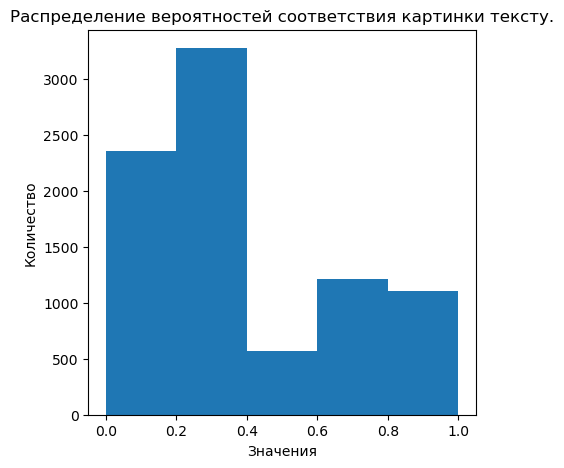

In [41]:
# Построение гистограммы распределения вероятностей.
plt.figure(figsize=(5, 5))  # Установим размер фигуры
plt.hist(full_data['target_ver'], bins = 5)
plt.title('Распределение вероятностей соответствия картинки тексту.')
plt.xlabel('Значения')  # Подпись оси X
plt.ylabel('Количество')  # Подпись оси Y
plt.show()


**Вывод:** Обучающие данные с изображением детей исключены из датасета. Датасет сократился на 22%. Данные распределены без сильного дисбаланса в значениях.

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментария студента</b></font>
   
Это самый простой и интуитивный способо, который можно предложить. Однако из предыдущего спринта у меня уже есть обученная модель, способная определять возраст людей. Имеет ли смысл встроить в модель - другую модель, чтобы отсеить фотографии детей из датасета? Или отдельно возможно даже прогнать ланные, которые у меня есть, через уже сузествующу. модель и сюда их выгрузить?

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
    
Ты удалил комментарии, в которых были запрещенные слова. Но наша задача убрать изображения, содержащие детей. Есть два способа сделать это:
    
 - Определить список плохих изображений, как изображения удовлетворяющие условиям:
    - Комментарий содержит плохие слова
    - <b>Оценка соответствия комментария и изображения выше порога.</b>
 - Удалить из нашего датасета все пары "изображение/описание" с плохими изображениями.
    
 
И второй, очень красивый способ. Он основан на том, что `query_id` содержит в с себе имя изображения, для которого он был написан (такая пасхалочка от авторов датасета).
    
 - Определить список плохих комментариев
 - У `query_id`  плохих комментариев отрезать два последних символа и получим список плохих изображений.
    
    
    
    
    
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментария студента</b></font>
   
Воспользовался 2 способом.

## Векторизация изображений

Перейдём к векторизации изображений.

Самый примитивный способ — прочесть изображение и превратить полученную матрицу в вектор. Такой способ нам не подходит: длина векторов может быть сильно разной, так как размеры изображений разные. Поэтому стоит обратиться к свёрточным сетям: они позволяют "выделить" главные компоненты изображений. Как это сделать? Нужно выбрать какую-либо архитектуру, например ResNet-18, посмотреть на слои и исключить полносвязные слои, которые отвечают за конечное предсказание. При этом можно загрузить модель данной архитектуры, предварительно натренированную на датасете ImageNet.

In [42]:
#Загрузка претренировочной модели
resnet = models.resnet18(pretrained=True)

/Users/maksimgorskov/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/maksimgorskov/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [43]:
for param in resnet.parameters():
    param.requires_grad_(False)

In [44]:
print(list(resnet.children()))

[Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False), BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True), ReLU(inplace=True), MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False), Sequential(
  (0): BasicBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (1): BasicBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bia

In [45]:
modules = list(resnet.children())[:-1]
resnet = nn.Sequential(*modules)
resnet.eval();

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Я знаю, что совет "отрезать" два последних слоя был в тренажере. Однако я настоятельно рекомендую отрезать только один последний слой, в этом случае размерность вектора признаков будет всего 512 и нашим моделям будет проще работать.
    
    
Помечаю комментарий красным из за критической важности.  Он не является обязательным. 

</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Подавить нежелательный вывод объектов, возвращемых в последней строке можно просто доавив точку с запятой после команды в последней строке

</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментария студента</b></font>
    
Оба комментария учтены в коде.
</div>

In [46]:
norm = transforms.Normalize(
    mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    norm,
])

In [47]:
#Данные должны находиться в локальной папке "train_images" внутри общей директории, указанной в разделе с импортами.
img_folder = PATH + 'train_images'

#Функция для эмбединга одного изображения.
# Декоратор для кэширования результатов функции
@lru_cache(maxsize=None)  # maxsize=None означает, что размер кэша не ограничен
def img_emb(img_name: str) -> torch.Tensor:
    img_path = os.path.join(img_folder, img_name)
    img = Image.open(img_path).convert('RGB')
    image_tensor = preprocess(img).unsqueeze(0)
    with torch.no_grad():
        output_tensor = resnet(image_tensor).flatten()
    return output_tensor.numpy()

In [48]:
#Преобразование каждого значения эмбединга в отдельный столбец DataFrame
embeddings = full_data['image'].apply(lambda img_name: pd.Series(img_emb(img_name)))
embeddings.columns = [f'emb_{i}' for i in range(embeddings.shape[1])]

# Объедине начальный DataFrame full_data с новыми столбцами embeddings
full_data = pd.concat([full_data, embeddings], axis=1)

In [49]:
full_data.head()

,image,description_id,target_ver,query_text,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,...,emb_502,emb_503,emb_504,emb_505,emb_506,emb_507,emb_508,emb_509,emb_510,emb_511
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,0.0,A young child is wearing blue goggles and sitt...,0.693982,3.031816,2.916986,0.951921,0.936226,1.245219,...,0.444238,0.717755,0.294678,0.728790,1.153811,0.750846,1.196696,0.085011,1.056859,0.098236
1,1262583859_653f1469a9.jpg,2549968784_39bfbe44f9.jpg#2,0.0,A young child is wearing blue goggles and sitt...,0.428877,1.151235,1.185724,1.280535,0.032984,2.268046,...,0.678554,0.518258,0.927872,1.287713,0.727416,1.204197,0.185985,1.001363,1.401694,0.689755
4,2621415349_ef1a7e73be.jpg,2549968784_39bfbe44f9.jpg#2,0.0,A young child is wearing blue goggles and sitt...,2.199275,1.652241,2.472460,0.968295,0.613417,0.603528,...,0.678830,0.132318,1.314382,2.436483,5.474368,1.417148,0.014816,1.559052,0.415332,0.644130
6,3155451946_c0862c70cb.jpg,2549968784_39bfbe44f9.jpg#2,0.0,A young child is wearing blue goggles and sitt...,0.476789,0.516116,1.505917,0.879466,0.001574,0.585607,...,0.627553,1.203488,2.934108,0.498592,1.248345,1.117928,1.121785,2.810123,1.892205,1.877238
7,3222041930_f642f49d28.jpg,2549968784_39bfbe44f9.jpg#2,0.0,A young child is wearing blue goggles and sitt...,1.859864,2.073177,1.116257,1.751574,0.208847,1.309823,...,0.407417,1.213629,1.492940,0.690386,1.285157,0.822072,2.123314,1.957899,1.500282,0.300742


<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">

    
У тебя 1000 уникальных изображений (изначально было 1000, но до трети может уйти при чистке). При этом ты векторизуешь почти 6 тысяч изображений. Значит некоторые изображения векторизуются по нескольку раз. Учитыая что ты написал отдельную функцию для векторизации изображения можно ускорить её работу используя кэширование. Попробуй загуглить @lru_cache, это декоратор для кэширования, входящий в стадартную библиотеку python
    
Правда чтобы декоратор заработал, тип, которы ты передаешь в функцию нужно сменить на String (сейчас у тебя там ряд датафрейма). И применять к колонке с названиями изображений.    
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментария студента</b></font>
    
Код оптимизирован.
</div>

**Вывод:**

В тренировочный датасет добавлен вектор изображений.

## Векторизация текстов

### Лемметизация текстов

In [50]:
#Функция для чистки текста от лишних символов.
def text_preprocessing(text):
    tokenized = nltk.word_tokenize(text)
    joined = ' '.join(tokenized)
    text_only = re.sub(r"[^a-z0-9!@#\$%\^\&\*_\-,\.' ]", ' ', joined)
    final = ' '.join(text_only.split())
    return final

In [51]:
tqdm.pandas()
#Применение функции очистки к фрему данных.
full_data['query_text'] = full_data['query_text'].progress_apply(text_preprocessing)

100%|████████████████████████████████████| 8519/8519 [00:00<00:00, 28122.48it/s]


In [52]:
#Инициализация модели NLP
nlp = spacy.load('en_core_web_sm')
#, exclude=['parser', 'attribute_ruler', 'ner']

In [53]:
#Функция для лемматизации текстов.
def lemmatize(text):
    doc = nlp(text)
    words = []
    for token in doc:
        if (token.is_stop != True) and (token.is_punct != True) and\
            (token.is_space != True) and (token.is_digit != True):
            words.append(token.lemma_)
    return ' '.join(words)

In [54]:
#Лемметизация текста
tqdm.pandas()
full_data['query_text'] = full_data['query_text'].progress_apply(lemmatize)

100%|██████████████████████████████████████| 8519/8519 [00:20<00:00, 414.12it/s]


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
По чистке и лемматизации  ОК</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Вижу что ты используешь TF-IDF и молодец, что помнишь, что векторизовть тексты нужно ПОСЛЕ  разделения на обучающую и валидационые выборки.
    
------
    
Хотя для нашего проекта, где уникальных текстов всего 977 думаю не было бы большой проблемой сделать векторизацию сразу, я не вижу  больших утечек и проблем с метрикой (но это исключение из правил)    


</div>

## Обучение модели предсказания соответствия

Для обучения разделите датасет на тренировочную и тестовую выборки. Простое случайное разбиение не подходит: нужно исключить попадание изображения и в обучающую, и в тестовую выборки.
Для того чтобы учесть изображения при разбиении, можно воспользоваться классом [GroupShuffleSplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GroupShuffleSplit.html) из библиотеки sklearn.model_selection.


Код ниже разбивает датасет на тренировочную и тестовую выборки в пропорции 7:3 так, что строки с одинаковым значением 'group_column' будут содержаться либо в тестовом, либо в тренировочном датасете.

```
from sklearn.model_selection import GroupShuffleSplit
gss = GroupShuffleSplit(n_splits=1, train_size=.7, random_state=42)
train_indices, test_indices = next(gss.split(X=df.drop(columns=['target']), y=df['target'], groups=df['group_column']))
train_df, test_df = df.loc[train_indices], df.loc[test_indices]

```
**Определение метрики:**
Основная цель — оценить, насколько хорошо модель способна определить соответствие между текстом и изображением, тогда можно использовать следующую метрику:
- Mean Absolute Error (MAE): Это среднее значение абсолютных разностей между фактическими и прогнозируемыми значениями. MAE измеряет среднее абсолютное отклонение прогнозируемых значений от фактических значений.

**Определение задачи обучения.**

Т.к. в задаче целевая метрика представлена вероятностями, с которыми изображение соответствует описанию, то ниже будет решаться задача регрессии.

### Подготовка признаков

In [55]:
#Сброс индексов перед обучением.
full_data = full_data.reset_index(drop = True)


Определение целевого признака и набора фичей.

In [56]:
X = full_data.drop(['target_ver', 'description_id'], axis=1)
y = full_data['target_ver']

Разбиение на тестовую и валидационную выборки. Размер тестовой выборки = 70%, размер валидационной выборки - 30%.

In [57]:
gss = GroupShuffleSplit(n_splits=1, train_size=.7, random_state=42)
train_indices, valid_indices = next(gss.split(X=X,
                                             y=y,
                                             groups=full_data['image']))

train_df, valid_df = full_data.loc[train_indices], full_data.loc[valid_indices]


In [58]:
# Отдельное выделение признаков и целевой переменной из обучающей и валидационной выборок
X_train, y_train = train_df.drop(columns=['target_ver', 'description_id']), train_df['target_ver']
X_valid, y_valid = valid_df.drop(columns=['target_ver', 'description_id']), valid_df['target_ver']

# Проверка размерностей выборок
print("Train shape:", X_train.shape, y_train.shape)
print("Validation shape:", X_valid.shape, y_valid.shape)

Train shape: (5979, 514) (5979,)
Validation shape: (2540, 514) (2540,)


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично, благодаря использованию GroupShuffleSplit ты исключаешь попадание одного изображения в обучающий и валидационный наборы.</div>

**Вывод:**

Выборки разделены в правильном соотношении. Утечка данных из обучающей выборки исключена.

### TF-IDF

In [59]:
#Создание корпуса текстов. Добавление признаков в тестовую выборку.
corpus = X_train['query_text'].values
count_tf_idf = TfidfVectorizer(stop_words=stop_words)
X_train_tfidf = count_tf_idf.fit_transform(corpus) 
print(f'Размер матрицы для обучения: {X_train_tfidf.shape}')

Размер матрицы для обучения: (5979, 1150)


In [60]:
#Создание корпуса текстов. Добавление признаков в валидационную выборку выборку.
corpus = X_valid['query_text'].values
X_valid_tfidf = count_tf_idf.transform(corpus) 
print(f'Размер матрицы для обучения: {X_valid_tfidf.shape}')

Размер матрицы для обучения: (2540, 1150)


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Похоже именно здесь у тебя ключевая ошибка. Мы хотим учить модель на векторах, полученных объединением векторов, полученных из изображений и описаний. А здесь я вижу ты просто получаешь вектор признака из TF-IDF при этом полностью теряешь признак, полученный из изображений. Учитывя такую критичную ошибку делать ревью дальше не вижу смысла....</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментария студента</b></font>
    
Тоже нашел эту проблему наконей-то. Тиже в коде я ее решил.
</div>

### Объединение эмбедингов и векторов TF-IDF.

**Объединение векторов для тестовой выборки.**

In [61]:
#Преобразование разреженной матрицы в датафрейм.
tfidf_df_train = pd.DataFrame(X_train_tfidf.toarray(), columns=count_tf_idf.get_feature_names_out())

#Проверка на соответствие индексов.
tfidf_df_train.index = X_train.index

# Объединение X_train и tfidf_df_train по индексам
train_merge = pd.merge(X_train, tfidf_df_train, left_index=True, right_index=True)

# Проверка результата
print(f'Размер матрицы для обучения: {train_merge.shape}')

Размер матрицы для обучения: (5979, 1664)


**Объединение векторов для валидационной выборки.**

In [62]:
#Преобразование разреженной матрицы в датафрейм.
tfidf_df_valid = pd.DataFrame(X_valid_tfidf.toarray(), columns=count_tf_idf.get_feature_names_out())

#Проверка на соответствие индексов.
tfidf_df_valid.index = X_valid.index

# Объединение X_valid и tfidf_df_valid по индексам
valid_merge = pd.merge(X_valid, tfidf_df_valid, left_index=True, right_index=True)

# Проверка результата
print(f'Размер матрицы для валидации: {valid_merge.shape}')

Размер матрицы для валидации: (2540, 1664)


### Удаление ненужных категориальных признаков.

In [63]:
train_merge = train_merge.drop(columns=['image', 'query_text'])
valid_merge = valid_merge.drop(columns=['image', 'query_text'])

### CatBoostRegressor

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Мы решаем новую задачу и не знаем, наксколько хороши наши метрики и наши модели. Поэтому советую начать с бейзлайна - константной модели (можешь взять простой DummyRegressor).</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментария студента</b></font>
    
Ниже я добавил нейронную сеть. Результаты моделей можно будет проанализирвоать относительно друг-друга. Поимом этого предварительно я "поиграл" с гиперпараметрами.
</div>

In [64]:
#Функция для обучения модели CatBoostRegressor
def fit_model(train_pool, test_pool, **kwargs):
    model = CatBoostRegressor(
        iterations=5000,
        eval_metric='MAE',
        od_type='Iter',
        od_wait=500,
        l2_leaf_reg=2,
        border_count=32,
        depth=5,
        random_state=42,
        boosting_type='Plain',
        **kwargs
    )
    return model.fit(
        train_pool,
        eval_set=test_pool,
        verbose=500,
        use_best_model=True)

In [65]:
#Категориальные признаки:
#cat_features = ['image', 'query_text']

# Создание объекта Pool для обучения
train_pool = Pool(
    data=train_merge,
    label=y_train, 
    #cat_features = cat_features
)

# Создание объекта Pool для теста
valid_pool = Pool(
    data=valid_merge,
    label=y_valid,
    #cat_features = cat_features
)

In [66]:
%%time
start_time = time.time()

model_cbc = fit_model(
    train_pool, valid_pool,
    learning_rate=0.001,
    tokenizers=[
        {
            'tokenizer_id': 'Sense',
            'separator_type': 'BySense',
            'lowercasing': 'True',
            'token_types':['Word', 'Number', 'SentenceBreak'],
            'sub_tokens_policy':'SeveralTokens'
        }      
    ],
    dictionaries = [
        {
            'dictionary_id': 'Word',
            'max_dictionary_size': '50000'
        }
    ],
    feature_calcers = [
        'BoW:top_tokens_count=10000'
    ]
)

end_time = time.time()
model_1_time = round(end_time - start_time, 0)

0:	learn: 0.2469509	test: 0.2505466	best: 0.2505466 (0)	total: 63.1ms	remaining: 5m 15s
500:	learn: 0.2399960	test: 0.2442703	best: 0.2442703 (500)	total: 1.86s	remaining: 16.8s
1000:	learn: 0.2356599	test: 0.2408070	best: 0.2408070 (1000)	total: 3.67s	remaining: 14.7s
1500:	learn: 0.2324218	test: 0.2386422	best: 0.2386422 (1500)	total: 5.48s	remaining: 12.8s
2000:	learn: 0.2297195	test: 0.2369214	best: 0.2369214 (2000)	total: 7.29s	remaining: 10.9s
2500:	learn: 0.2273588	test: 0.2355763	best: 0.2355763 (2500)	total: 9.1s	remaining: 9.09s
3000:	learn: 0.2253089	test: 0.2344784	best: 0.2344784 (3000)	total: 10.9s	remaining: 7.26s
3500:	learn: 0.2235289	test: 0.2335910	best: 0.2335908 (3499)	total: 12.7s	remaining: 5.43s
4000:	learn: 0.2218904	test: 0.2327933	best: 0.2327933 (4000)	total: 14.5s	remaining: 3.63s
4500:	learn: 0.2204429	test: 0.2320973	best: 0.2320973 (4500)	total: 16.3s	remaining: 1.81s
4999:	learn: 0.2190622	test: 0.2314615	best: 0.2314615 (4999)	total: 18.1s	remaining: 0

**Вывод:**
На тестовой выборке абсолютное отклонение от вероятности соответствия картинки с текстом составляет 23%.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
    
    
Авторы проекта предполагали, что в качестве одной из моделей будет использовна нейронная сеть, т.к. это достаточно универсальный инструмент активно используемый как в задачах работы с изображениями, так и текстами.</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментария студента</b></font>
    
Нейронная сеть представлена ниже.
</div>

### Построение нейронной сети. 

In [126]:
class NeuralNet (nn.Module):
    def __init__ (self,
                    n_in_neurons,
                    n_hidden_neurons_1,
                    n_hidden_neurons_2,
                    n_hidden_neurons_3,
                    out_neurons, p):
    
        super(NeuralNet, self).__init__()

        #Создание полносвязного графа
        self.fc1 = nn.Linear(n_in_neurons, n_hidden_neurons_1)
        self.fc2 = nn.Linear(n_hidden_neurons_1, n_hidden_neurons_2)
        self.fc3 = nn.Linear(n_hidden_neurons_2, n_hidden_neurons_3)
        self.fc = nn.Linear(n_hidden_neurons_3, out_neurons)

        #Создание функции активации
        self.act1 = nn.ReLU()
        self.act2 = nn.ReLU()
        self.act3 = nn.ReLU()

        #формула для расчета стандартного отклонения 
        #std = (2/(n+(n+1)))**0.5, где n - кол-во нейронов в 1 слое

        #Инициализация весов и отступов
        std1 = (2/(n_in_neurons + n_hidden_neurons_1))**0.5
        nn.init.normal_(self.fc1.weight, mean=0, std=std1)
        nn.init.normal_(self.fc1.bias, mean=0, std=std1)

        std2 = (2/(n_hidden_neurons_1 + n_hidden_neurons_2))**0.5
        nn.init.normal_(self.fc2.weight, mean=0, std=std2)
        nn.init.normal_(self.fc2.bias, mean=0, std=std2)

        std3 = (2/(n_hidden_neurons_2 + n_hidden_neurons_3))**0.5
        nn.init.normal_(self.fc3.weight, mean=0, std=std3)
        nn.init.normal_(self.fc3.bias, mean=0, std=std3)


        #Введение dropout
        self.dp1 = nn.Dropout(p=p)
        self.dp2 = nn.Dropout(p=p)
        self.dp3 = nn.Dropout(p=p)


    def forward(self, x):
        out = self.fc1(x)
        out = self.act1(out)
        out = self.dp1(out)

        out = self.fc2(out)
        out = self.act2(out)
        out = self.dp2(out)

        out = self.fc3(out)
        out = self.act3(out)
        out = self.dp3(out)

        out = self.fc(out)

        return out

In [117]:
#Перевод данных в тензор.
X_train_nn = torch.FloatTensor(train_merge.values)
X_valid_nn = torch.FloatTensor(valid_merge.values)
y_train_nn = torch.FloatTensor(y_train.values)
y_valid_nn = torch.FloatTensor(y_valid.values)

In [118]:
#Задание количества нейронов в слоях нейронной сети.
n_in_neurons = X_train_nn.shape[1]
n_hidden_neurons_1 = 140
n_hidden_neurons_2 = 60
n_hidden_neurons_3 =20
n_out_neurons = 1


In [119]:
#Заданеи слоев для нейронной сети 
net_layers = [n_in_neurons, 
              n_hidden_neurons_1, 
              n_hidden_neurons_2, 
              n_hidden_neurons_3,  
              n_out_neurons] 

#количество эпох обучения нейронки
num_epoch =10000

#скорость обучения
learning_rate = 0.001

#random_state для train_test_split
rand_st = 42

In [134]:
#Фиксация значений у рандомайзеров для вопроизводимости результатов
random.seed(rand_st)
np.random.seed(rand_st)
torch.manual_seed(rand_st)
torch.use_deterministic_algorithms(True)

net = NeuralNet(*net_layers, 0.1) #Base Line строится без Dropout
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
# Функция потерь для регрессии
loss_function = nn.MSELoss()


patience = 10  #количество эпох без улучшений после которых обучение будет остановлено
patience_counter = 0

In [135]:
best_mae = float('inf')  # Инициализируем лучшую MAE как бесконечность для минимизации
best_model = None  # Для сохранения лучшей модели
patience_counter = 0  # Счётчик для ранней остановки

for epoch in range(num_epoch):
    net.train()
    optimizer.zero_grad()  # Обнуление градиентов

    predictions_train = net(X_train_nn).flatten()
    
    loss_value = loss_function(predictions_train, y_train_nn)
    loss_value.backward()
    
    optimizer.step()
    
    if epoch % 10 == 0:
        with torch.no_grad():
            net.eval()
            predictions_val = net(X_valid_nn).flatten()
            
            mae = mean_absolute_error(y_valid_nn, predictions_val)

            if epoch % 500 == 0:
                print(f'MAE for {epoch} epoch: {mae:.3f}')
            
            if mae < best_mae:
                best_mae = mae
                best_model = copy.deepcopy(net.state_dict())
                patience_counter = 0
            else:
                patience_counter += 1

            if patience_counter >= patience:
                print("Early stopping")
                break

# Восстанавливаем лучшую модель
net.load_state_dict(best_model)
net.eval()
predictions_val = net(X_valid_nn).flatten()
final_mae = mean_absolute_error(y_valid_nn, predictions_val.detach().numpy())
print(f'Best MAE: {final_mae:.3f}')

MAE for 0 epoch: 0.280
Early stopping
Best MAE: 0.234


## Тестирование модели

Настало время протестировать модель. Для этого получите эмбеддинги для всех тестовых изображений из папки `test_images`, выберите случайные 10 запросов из файла `test_queries.csv` и для каждого запроса выведите наиболее релевантное изображение. Сравните визуально качество поиска.

Описание методики определения картинки по запросу:

1) На базе 10 рандомных запросов и на базе датасета test_queries_data создается новый набор данных. Формирование датасета осуществляется следующим образом:
- Для кадого униканльгого изображения из датасета test_queries_data присваивается один и тот же запрос из спсика рандомных запросов.
- Данная опирация повторяется 10 раз.

2) Производится предобработка полученного датасета.

3) На основании ранее обучнной модели делается прогноз о вероятности корреляций изображений и описаний к ним.

4) Для каждого запроса выводится наиболее релевантное изображение. На основании вероятностей совпадений.


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Здесь я попрошу тебя немного переделать логику инференса.
    
Ты уже на финишной прямой курса и во всю ипользуешь функции. Поэтому я попрошу тебя оформить тестирование следующим образом: нужно написать функцию, способную искать изображение по тексту для одного изображения.
 
  Что должна делаь функция
    
   - Получать текст
   - Возвращать картинку и метрику близости. 
   - Выдавать дисклеймер если запрос некорректный
    
А затем нужно 10 раз применить функцию к 10 случайным запросам.   
    
Т.е. функция должна работать с любым запросом. Поэтому векторизацию запроса мы делаем в теле функции. А вот векторизацию изображений лучше сделать заранее.
    
Внутри функции должны выполняться векторизация текста + получение 100 пар (вектор текста + вектор изображения). Для каждой пары получаем предсказание модели и выбираем пару с наивысшей оценкой соотвтствия.    
    
.</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментария студента</b></font>
Перед разработкой функции решил запустить всю модель по уже разработанному шаблону. И столкнулся с проблемой. На катбусте и на нейронной сети метрика MAE показала очень хорошие результаты. Однако на тренировочной выборке все предсказания вероятностей не выходят за рамки 50%. А при выводе изображений по запросу я сталкиваюсь с ситуацией, когда на все запросы я получаю олдно, иногда 2 изображения. Прошу помочь найти ошибку, которую я допускаю.
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментария студента</b></font>
Идея с функцией - отличная. В параллель занимаюсь ее реализацией.
</div>

#### Формирование тестового датасета.

In [94]:
#Определение 10 рандомных запросов.
random_rows = test_queries_data.sample(n=10, random_state=42)['query_text']
random_rows = random_rows.reset_index(drop = True)

In [95]:
random_rows[0]

'A group of girls who are gothically dressed standing together'

In [96]:
test_values = pd.DataFrame(columns = ['image', 'query_text'])
for i in random_rows:
    temp_df=pd.DataFrame()
    temp_df['image'] = test_queries_data['image'].unique()
    temp_df['query_text'] = i
    test_values = pd.concat([test_values, temp_df], ignore_index=True)

In [97]:
test_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image       1000 non-null   object
 1   query_text  1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


**Вывод:**

Датафрейм представляет собой набор данных из 1000 записей. Пропуски отсутствуют.


### Подготовка тестового датасета.

#### Получение эмбедингов изображений.

In [98]:
#Перезапись пути для тестовых изображений для корректной работы функци.
img_folder = PATH + 'test_images'

#Преобразование каждого значения эмбединга в отдельный столбец DataFrame
embeddings = test_values['image'].apply(lambda img_name: pd.Series(img_emb(img_name)))
embeddings.columns = [f'emb_{i}' for i in range(embeddings.shape[1])]

# Объедине начальный DataFrame full_data с новыми столбцами embeddings
test_values = pd.concat([test_values, embeddings], axis=1)

In [99]:
test_values.head()

,image,query_text,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,...,emb_502,emb_503,emb_504,emb_505,emb_506,emb_507,emb_508,emb_509,emb_510,emb_511
0,1177994172_10d143cb8d.jpg,A group of girls who are gothically dressed st...,0.443963,2.334485,0.006339,2.394351,0.022514,0.329741,1.683887,1.900140,...,0.141605,0.323036,1.905803,1.066337,0.000000,2.231436,2.022535,2.292717,0.793585,0.850107
1,1232148178_4f45cc3284.jpg,A group of girls who are gothically dressed st...,0.838445,1.568587,1.886731,2.837503,0.734879,0.470229,0.823981,1.701099,...,2.110207,0.119371,0.799624,1.104447,1.747197,0.424487,0.182695,1.534219,1.347148,0.404173
2,123997871_6a9ca987b1.jpg,A group of girls who are gothically dressed st...,0.443765,0.826595,1.753989,1.080986,0.542635,0.970871,0.315570,0.813559,...,0.700835,0.281531,2.178856,1.093006,0.865927,1.917957,2.054577,1.667659,1.023102,1.039767
3,1319634306_816f21677f.jpg,A group of girls who are gothically dressed st...,0.335737,0.291325,1.498222,0.186021,0.180829,0.099376,1.703926,1.509953,...,0.335948,0.649706,0.139001,0.785381,0.806340,0.243200,0.270097,0.894144,0.454314,0.001900
4,1429546659_44cb09cbe2.jpg,A group of girls who are gothically dressed st...,0.189787,1.876469,0.825717,0.621147,2.310624,0.565719,0.033543,0.556440,...,0.879859,0.729772,0.114588,0.915989,0.860376,1.078615,0.487137,1.073110,0.847128,0.025274


#### Лемметизация текстов.

In [100]:
#Чистка текста.
tqdm.pandas()
#Применение функции очистки к фрейму данных.
test_values['query_text'] = test_values['query_text'].progress_apply(text_preprocessing)

#Лемметизация текста
tqdm.pandas()
test_values['query_text'] = test_values['query_text'].progress_apply(lemmatize)

test_values.head()

100%|██████████████████████████████████████| 1000/1000 [00:02<00:00, 417.29it/s]


,image,query_text,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,...,emb_502,emb_503,emb_504,emb_505,emb_506,emb_507,emb_508,emb_509,emb_510,emb_511
0,1177994172_10d143cb8d.jpg,group girl gothically dress stand,0.443963,2.334485,0.006339,2.394351,0.022514,0.329741,1.683887,1.900140,...,0.141605,0.323036,1.905803,1.066337,0.000000,2.231436,2.022535,2.292717,0.793585,0.850107
1,1232148178_4f45cc3284.jpg,group girl gothically dress stand,0.838445,1.568587,1.886731,2.837503,0.734879,0.470229,0.823981,1.701099,...,2.110207,0.119371,0.799624,1.104447,1.747197,0.424487,0.182695,1.534219,1.347148,0.404173
2,123997871_6a9ca987b1.jpg,group girl gothically dress stand,0.443765,0.826595,1.753989,1.080986,0.542635,0.970871,0.315570,0.813559,...,0.700835,0.281531,2.178856,1.093006,0.865927,1.917957,2.054577,1.667659,1.023102,1.039767
3,1319634306_816f21677f.jpg,group girl gothically dress stand,0.335737,0.291325,1.498222,0.186021,0.180829,0.099376,1.703926,1.509953,...,0.335948,0.649706,0.139001,0.785381,0.806340,0.243200,0.270097,0.894144,0.454314,0.001900
4,1429546659_44cb09cbe2.jpg,group girl gothically dress stand,0.189787,1.876469,0.825717,0.621147,2.310624,0.565719,0.033543,0.556440,...,0.879859,0.729772,0.114588,0.915989,0.860376,1.078615,0.487137,1.073110,0.847128,0.025274


#### TF-IDF

In [102]:
#Создание корпуса текстов. Добавление признаков в тестовую выборку.
corpus = test_values['query_text'].values
test_values_tfidf = count_tf_idf.transform(corpus) 
print(f'Размер матрицы для обучения: {test_values_tfidf.shape}')

Размер матрицы для обучения: (1000, 1150)


#### Объединение эмбедингов и векторов TF-IDF

In [103]:
#Преобразование разреженной матрицы в датафрейм.
tfidf_df_test = pd.DataFrame(test_values_tfidf.toarray(), columns=count_tf_idf.get_feature_names_out())

#Проверка на соответствие индексов.
tfidf_df_test.index = test_values.index

# Объединение test_values_data и test_values_tfidf по индексам
test_merge = pd.merge(test_values, tfidf_df_test, left_index=True, right_index=True)

# Проверка результата
print(f'Размер матрицы для теста: {test_merge.shape}')

Размер матрицы для теста: (1000, 1664)


**Вывод:**

Тестовая выборка готова.Количество признаков совпадает с тренировочной выборкой.

#### Удаление ненужных категориальных признаков.

In [104]:
test_merge = test_merge.drop(columns=['image', 'query_text'])

### Предсказание вероятностей соответствия изображений и описаний к ним.

In [ ]:
#Категориальные признаки:
cat_features = ['image', 'query_text']
test_pool = Pool(
        data=test_merge,
        cat_features = cat_features
)

In [136]:
#Тренировочный тензор:
train_nn = torch.FloatTensor(test_merge.values)

In [137]:
# Шаг 3: Перевод модели в режим оценки
net.eval()  # net - это ваша нейронная сеть

# Шаг 4: Загрузка лучшей модели и выполнение предсказания
# Если best_model - это словарь состояний, сначала загрузите его в модель
net.load_state_dict(best_model)

with torch.no_grad():  # Отключаем вычисление градиентов
    predictions = net(train_nn).flatten()

In [138]:
# Преобразование предсказаний NumPy массива в список
predictions_list = predictions.tolist()
len(predictions_list)

1000

In [139]:
predictions_list

[0.2007753849029541,
 0.20006823539733887,
 0.38320302963256836,
 0.26108139753341675,
 0.2933657765388489,
 0.22047129273414612,
 0.22333762049674988,
 0.4230004847049713,
 0.20949357748031616,
 0.2836722731590271,
 0.16634127497673035,
 0.1543339490890503,
 0.22267895936965942,
 0.293185293674469,
 0.41192638874053955,
 0.39155155420303345,
 0.2126348912715912,
 0.22999686002731323,
 0.21343567967414856,
 0.2168741226196289,
 0.1979919672012329,
 0.3916442096233368,
 0.4143238365650177,
 0.22957593202590942,
 0.21993505954742432,
 0.3449579179286957,
 0.30213069915771484,
 0.15272417664527893,
 0.2530244290828705,
 0.251666396856308,
 0.15483474731445312,
 0.29501283168792725,
 0.37863633036613464,
 0.23749634623527527,
 0.18780237436294556,
 0.34501224756240845,
 0.2892220914363861,
 0.24988135695457458,
 0.4939993619918823,
 0.15817329287528992,
 0.4498481750488281,
 0.34954413771629333,
 0.22017601132392883,
 0.2569812834262848,
 0.19838711619377136,
 0.21253380179405212,
 0.32814

In [140]:
test_values['ver_pred'] = predictions_list
test_values.head()

,image,query_text,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,...,emb_503,emb_504,emb_505,emb_506,emb_507,emb_508,emb_509,emb_510,emb_511,ver_pred
0,1177994172_10d143cb8d.jpg,group girl gothically dress stand,0.443963,2.334485,0.006339,2.394351,0.022514,0.329741,1.683887,1.900140,...,0.323036,1.905803,1.066337,0.000000,2.231436,2.022535,2.292717,0.793585,0.850107,0.200775
1,1232148178_4f45cc3284.jpg,group girl gothically dress stand,0.838445,1.568587,1.886731,2.837503,0.734879,0.470229,0.823981,1.701099,...,0.119371,0.799624,1.104447,1.747197,0.424487,0.182695,1.534219,1.347148,0.404173,0.200068
2,123997871_6a9ca987b1.jpg,group girl gothically dress stand,0.443765,0.826595,1.753989,1.080986,0.542635,0.970871,0.315570,0.813559,...,0.281531,2.178856,1.093006,0.865927,1.917957,2.054577,1.667659,1.023102,1.039767,0.383203
3,1319634306_816f21677f.jpg,group girl gothically dress stand,0.335737,0.291325,1.498222,0.186021,0.180829,0.099376,1.703926,1.509953,...,0.649706,0.139001,0.785381,0.806340,0.243200,0.270097,0.894144,0.454314,0.001900,0.261081
4,1429546659_44cb09cbe2.jpg,group girl gothically dress stand,0.189787,1.876469,0.825717,0.621147,2.310624,0.565719,0.033543,0.556440,...,0.729772,0.114588,0.915989,0.860376,1.078615,0.487137,1.073110,0.847128,0.025274,0.293366


### Ранжирование результатов.

In [141]:
unique_requests = test_values['query_text'].unique()
unique_requests

array(['group girl gothically dress stand',
       'woman girl ride downhill sled dog run alongside', 'dog run',
       'group people ice skate big city',
       'ittle kid blue coat hat ride tricycle',
       'will black dog fight orange toy',
       'dog jump tennis ball near ocean', 'oy fly distant kite',
       'kid play ultimate risbee', 'girl purple shirt feed duck'],
      dtype=object)

In [142]:
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor()
])

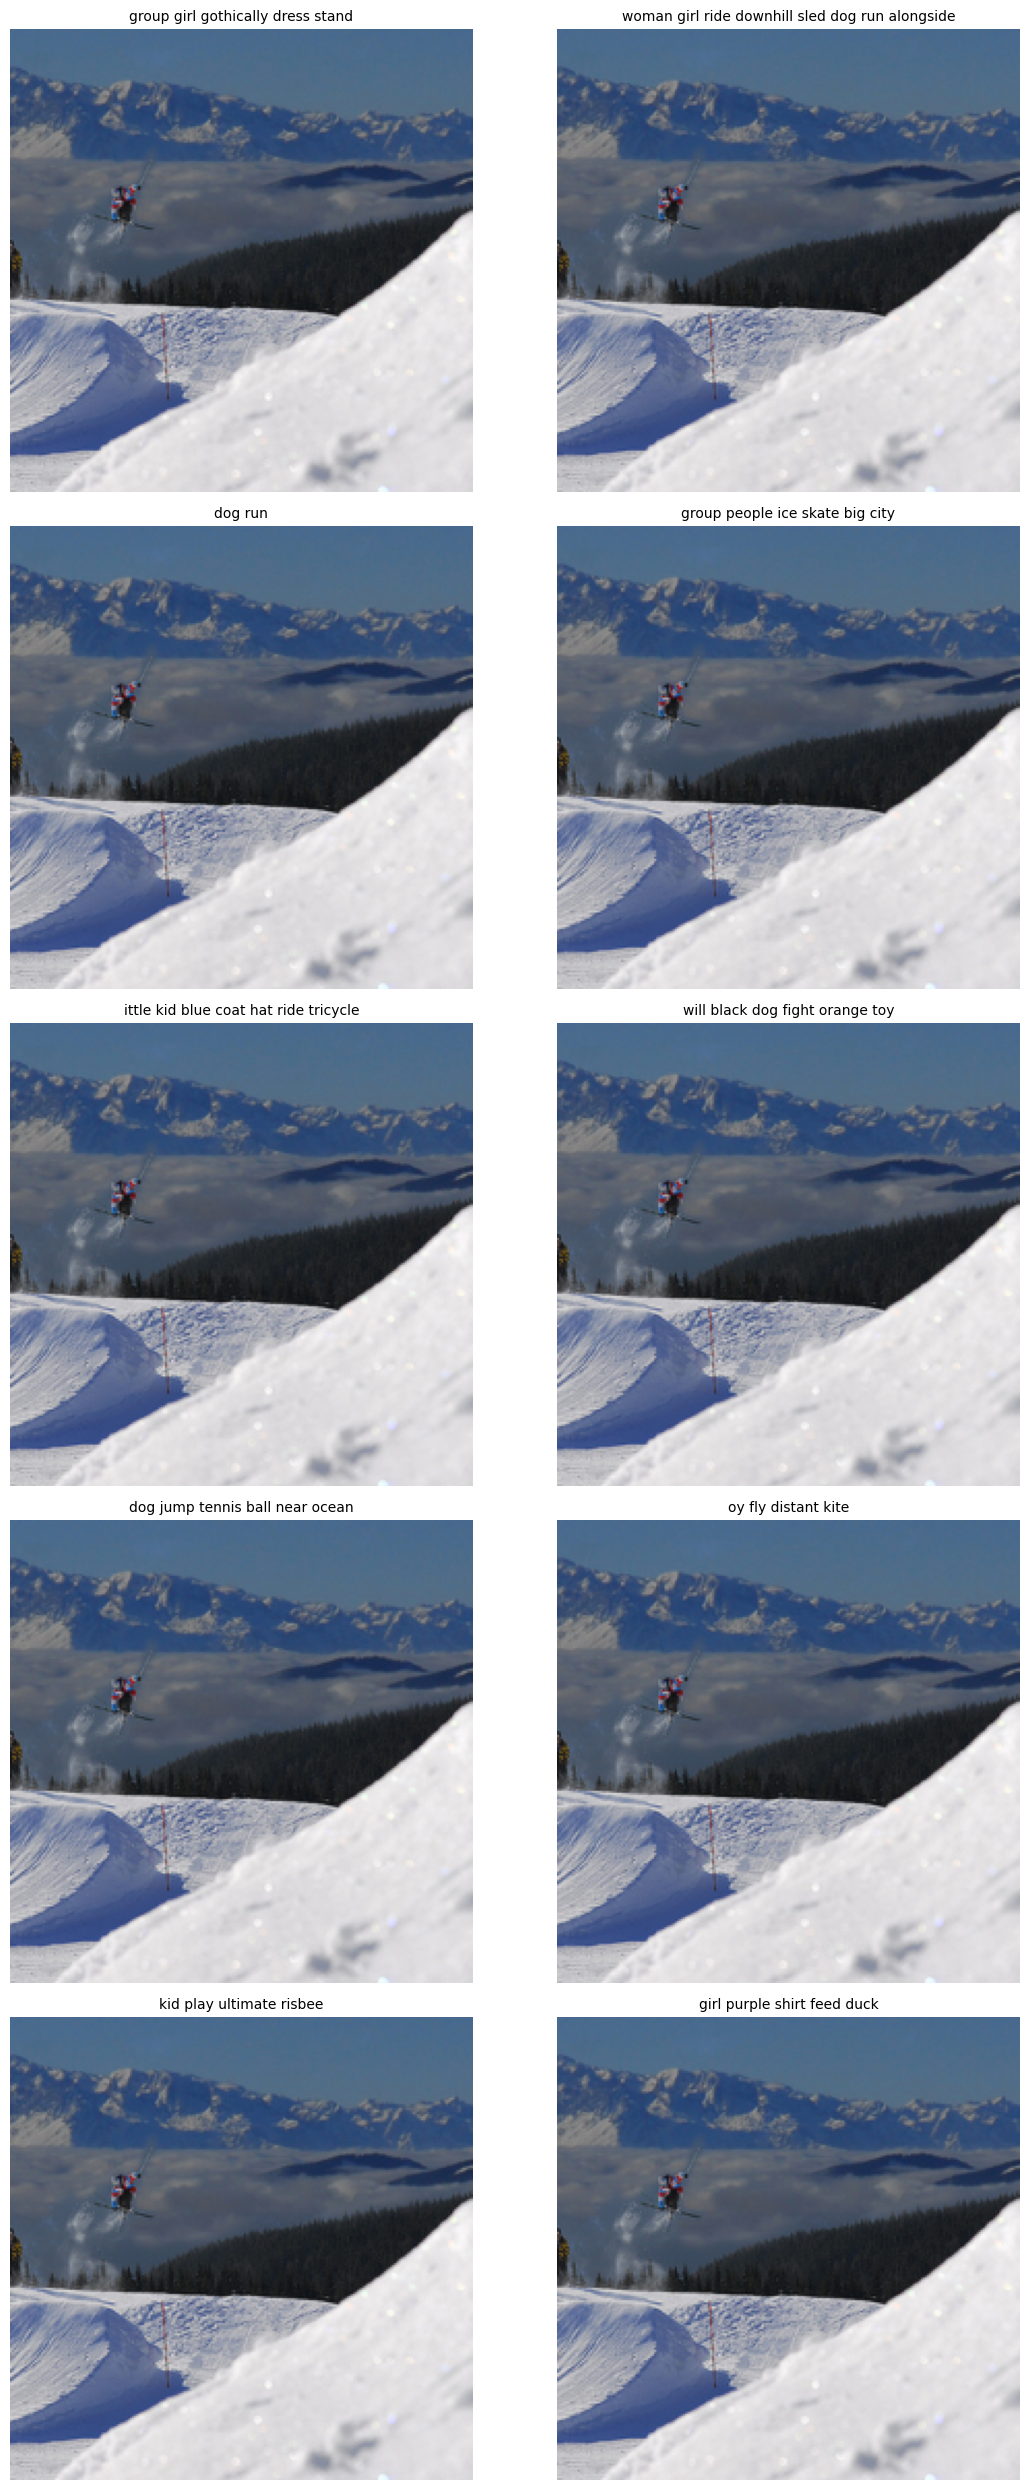

In [143]:
#Перезапись пути для тестовых изображений для корректной работы функци.
img_folder = PATH + 'test_images'

# Создание сетки изображений
num_images = len(unique_requests)
cols = 2  # Количество колонок в сетке
rows = (num_images + cols - 1) // cols  # Количество строк в сетке

plt.figure(figsize=(cols * 6, rows * 5))  # Установка размера фигуры

for i, unique_request in enumerate(unique_requests):
    filtered_df = test_values[test_values['query_text'] == unique_request]
    max_pred = filtered_df['ver_pred'].max()
    i_image_name = filtered_df[filtered_df['ver_pred'] == max_pred]['image'].iloc[0]

    # Полный путь к i-му изображению
    i_image_path = os.path.join(img_folder, i_image_name)
    # Загрузка изображения
    img = Image.open(i_image_path).convert('RGB')
    # Преобразование изображения
    img_transformed = transform(img)

    # Отображение изображения
    ax = plt.subplot(rows, cols, i + 1)
    img_show = transforms.ToPILImage()(img_transformed)
    ax.imshow(img_show)
    ax.set_title(unique_request, fontsize=10)
    ax.axis('off')

plt.tight_layout()
plt.show()

## Выводы

- Jupyter Notebook открыт
- Весь код выполняется без ошибок
- Ячейки с кодом расположены в порядке исполнения
- Исследовательский анализ данных выполнен
- Проверены экспертные оценки и краудсорсинговые оценки
- Из датасета исключены те объекты, которые выходят за рамки юридических ограничений
- Изображения векторизованы
- Текстовые запросы векторизованы
- Данные корректно разбиты на тренировочную и тестовую выборки
- Предложена метрика качества работы модели
- Предложена модель схожести изображений и текстового запроса
- Модель обучена
- По итогам обучения модели сделаны выводы
- Проведено тестирование работы модели
- По итогам тестирования визуально сравнили качество поиска